
### Created on Fri Jun 12th 2020

### @author: Maximilian Forstenhaeusler

# AFM - Contact Mode Example using the afmsim library

### Description 
This is an example of how the library afmsim can be implimeted to simulate an AFM contact mode.  

### Call libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from afmsim import contact_mode, differential_constants
from numba import jit
from joblib import dump

__________________________________________________________________________________________________________________
### Input parameteres
#### Cantilever and tip parameters

In [2]:
vb = 1000e-9  # velocity of approaching sample
zb = 100e-9  # initial position of cantilever
Q1 = 100  # Quality Factor
k_m1 = 0.1  # equilibrium cantilever mass
fo1 = 10e3  # natural frequency
omega = 2.0 * np.pi * fo1
period1 = 1.0 / fo1  # fundamental period
m1 = k_m1 / pow((fo1 * 2 * np.pi), 2)  # mass cantilever
R = 20e-9  # radius tip
nu = 0.5  # poissons ratio of material
alfa = 8.0 / 3 * np.sqrt(R) / (1 - nu)
F_trigger = 800e-9

#### Molecular Interaction Forces - Constants

In [3]:
vdw = 2  # vdw constant
H = 2.0e-19  # Hammaker constant 
a = 0.2e-9  # 

#### Simulation Time

In [4]:
start = 0  # defines start of the simulation
landingtime = zb / vb
final_time = 1  # indentation time
stop = landingtime + final_time  # defines end of the simulation
timestep = period1 / 1.0e4
printstep = period1 / 10  # printstep of Force distance curve

time = np.arange(start, stop, timestep)  # time array 

#### Viscelastic Model Parameter 

In [5]:
arms = [3, 5]
Jg = 2.0e-10  # Glassy compliance
J_3 = np.zeros(arms[0])  # compliance array - 3 arm
tau_3 = np.zeros(arms[0])  # characteristic time array - 3 arm
J_5 = np.zeros(arms[1])  # compliance array - 5 arm
tau_5 = np.zeros(arms[1])  # characteristic time array - 5 arm

J_3[0], tau_3[0] = 5.0e-9, 0.5e-4
J_3[1], tau_3[1] = 7.0e-9, 0.5e-3
J_3[2], tau_3[2] = 1.0e-10, 0.5e-2

J_5[0], tau_5[0] = 5.0e-9, 0.5e-4
J_5[1], tau_5[1] = 7.0e-9, 0.5e-3
J_5[2], tau_5[2] = 1.0e-10, 0.5e-2
J_5[3], tau_5[3] = 3.0e-6, 0.5e-1
J_5[4], tau_5[4] = 4.0e-6, 0.5e-0

__________________________________________________________________________________________________________________

### Simulation 

#### Calculation of differential constants used for tip-sample force calculation in AFM simulation

In [6]:
u_3, q_3 = differential_constants('Gen. Kelvin-Voigt', Jg, J_3, tau_3)  # 3 Arm
u_5, q_5 = differential_constants('Gen. Kelvin-Voigt', Jg, J_5, tau_5)  # 5 Arm



#### AFM - Contact Mode simulation (SFS)

In [7]:
AFM_jit = jit()(contact_mode)  # calls AFM simul function and initializes numba procedure to increase iter. speed

Fts_3, tip_3, base_3 = AFM_jit(time, timestep, zb, vb, u_3, q_3, alfa, k_m1, m1, fo1, Q1, F_trigger, vdw, H, R, a)
Fts_5, tip_5, base_5 = AFM_jit(time, timestep, zb, vb, u_5, q_5, alfa, k_m1, m1, fo1, Q1, F_trigger, vdw, H, R, a)

Iteration: 0
For: 0.0
Tip: 9.999999999993717e-08
Base: 1e-07
Iteration: 1000000
For: 0.0
Tip: 9.00001386768289e-08
Base: 9e-08
Iteration: 2000000
For: 0.0
Tip: 8.000014852727925e-08
Base: 8e-08
Iteration: 3000000
For: 0.0
Tip: 7.000014912301664e-08
Base: 6.999999999999999e-08
Iteration: 4000000
For: 0.0
Tip: 6.000014919034495e-08
Base: 6e-08
Iteration: 5000000
For: 0.0
Tip: 5.000014914716919e-08
Base: 5e-08
Iteration: 6000000
For: 0.0
Tip: 4.000014915059892e-08
Base: 3.999999999999999e-08
Iteration: 7000000
For: 0.0
Tip: 3.0000149154028655e-08
Base: 2.999999999999999e-08
Iteration: 8000000
For: 0.0
Tip: 2.0000149157458387e-08
Base: 1.9999999999999994e-08
Iteration: 9000000
For: 0.0
Tip: 1.0000149152850448e-08
Base: 9.999999999999997e-09
Iteration: 10000000
For: 0.0
Tip: 1.4915465102243783e-13
Base: 0.0
Iteration: 11000000
For: 9.39734464537673e-10
Tip: -6.026589737807346e-10
Base: -9.999999999999997e-09
Iteration: 12000000
For: 1.902422111612727e-09
Tip: -9.75783674547271e-10
Base: -2.

Iteration: 88000000
For: 7.683806289896724e-08
Tip: -1.1619379423223992e-08
Base: -7.799999999999999e-07
Iteration: 89000000
For: 7.782809897772428e-08
Tip: -1.171901864221166e-08
Base: -7.9e-07
Iteration: 90000000
For: 7.881817681862518e-08
Tip: -1.1818240239890903e-08
Base: -8e-07
Iteration: 91000000
For: 7.980829572846651e-08
Tip: -1.1917051148045851e-08
Base: -8.1e-07
Iteration: 92000000
For: 8.07984550339451e-08
Tip: -1.2015458099448572e-08
Base: -8.2e-07
Iteration: 93000000
For: 8.17886540809391e-08
Tip: -1.211346763592262e-08
Base: -8.3e-07
Iteration: 94000000
For: 8.277889223354253e-08
Tip: -1.2211086115991496e-08
Base: -8.4e-07
Iteration: 95000000
For: 8.376916887352332e-08
Tip: -1.2308319722129347e-08
Base: -8.5e-07
Iteration: 96000000
For: 8.475948339959486e-08
Tip: -1.2405174467646594e-08
Base: -8.600000000000001e-07
Iteration: 97000000
For: 8.574983522662373e-08
Tip: -1.250165620322826e-08
Base: -8.7e-07
Iteration: 98000000
For: 8.674022378520469e-08
Tip: -1.25977706231446

Iteration: 67000000
For: 2.7733616628881857e-08
Tip: -2.926637680974628e-07
Base: -5.7e-07
Iteration: 68000000
For: 2.8258558239973526e-08
Tip: -2.974143521319468e-07
Base: -5.800000000000001e-07
Iteration: 69000000
For: 2.8784408383261953e-08
Tip: -3.021558508429627e-07
Base: -5.900000000000001e-07
Iteration: 70000000
For: 2.931115795171987e-08
Tip: -3.0688835530076396e-07
Base: -6.000000000000001e-07
Iteration: 71000000
For: 2.983879824833591e-08
Tip: -3.1161195247569144e-07
Base: -6.1e-07
Iteration: 72000000
For: 3.036732095637691e-08
Tip: -3.1632672553495044e-07
Base: -6.2e-07
Iteration: 73000000
For: 3.089671811209908e-08
Tip: -3.210327541164502e-07
Base: -6.3e-07
Iteration: 74000000
For: 3.142698207932159e-08
Tip: -3.257301145815647e-07
Base: -6.4e-07
Iteration: 75000000
For: 3.19581055262424e-08
Tip: -3.3041888024856105e-07
Base: -6.5e-07
Iteration: 76000000
For: 3.249008140378171e-08
Tip: -3.350991216082374e-07
Base: -6.599999999999999e-07
Iteration: 77000000
For: 3.30229029257

#### Storing the data 

In [8]:
print('\nstoring data...')
# initializes dictionary file to store data
data = {'Time [sec]': time,
        'Tip [m]': tip_5,
        'Fts [N]': Fts_5,
        'Base [m': base_5} 

dump(data, 'FD_AFM_data.pkl')  # stores data as pickle file on device
print('Data stored')


storing data...
Data stored


__________________________________________________________________________________________________________________
###  Force - Distance Graph

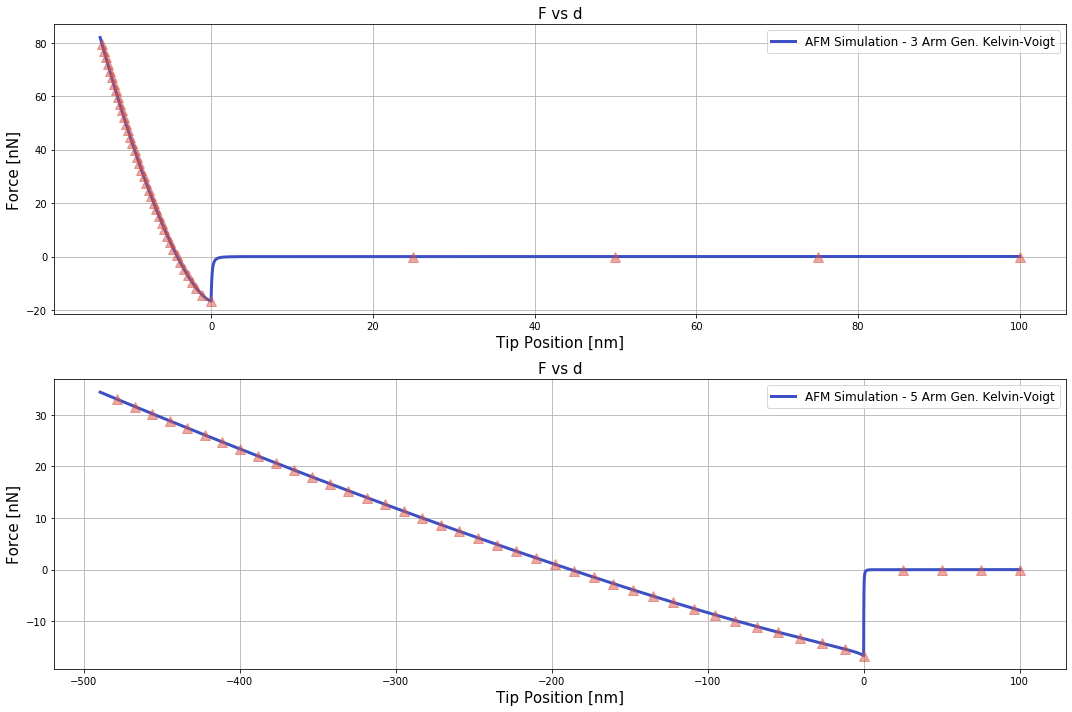

In [9]:
cmap = cm.coolwarm
colors = [cmap(0.01), cmap(0.9)]

fig, ax = plt.subplots(2, 1, figsize=(15, 10), tight_layout=True)

ax[0].set_title('F vs d', fontsize=15)
ax[0].plot(tip_3[::1000]*1e9, Fts_3[::1000]*1e9, '-', lw=3, c=colors[0], label='AFM Simulation - 3 Arm Gen. Kelvin-Voigt')
ax[0].plot(tip_3[::int(2.5e6)]*1e9, Fts_3[::int(2.5e6)]*1e9, '^', markersize=10, c=colors[1], alpha=0.5 )
ax[0].set_xlabel('Tip Position [nm]', fontsize=15)
ax[0].set_ylabel('Force [nN]', fontsize=15)
ax[0].grid()
ax[0].legend(fontsize=12)

ax[1].set_title('F vs d', fontsize=15)
ax[1].plot(tip_5[::1000]*1e9, Fts_5[::1000]*1e9, '-', lw=3, c=colors[0], label='AFM Simulation - 5 Arm Gen. Kelvin-Voigt')
ax[1].plot(tip_5[::int(2.5e6)]*1e9, Fts_5[::int(2.5e6)]*1e9, '^', markersize=10, c=colors[1], alpha=0.5 )
ax[1].set_xlabel('Tip Position [nm]', fontsize=15)
ax[1].set_ylabel('Force [nN]', fontsize=15)
ax[1].grid()
ax[1].legend(fontsize=12)

plt.show()